# OpenCV Image Processing
Basic image processing operations which might prove useful for machine learning image detection algorithms.

In [1]:
import cv2
import numpy as np
print(np.__version__)
print(cv2.__version__)

1.14.3
3.2.0


In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [10.0,10.0]

## Extracting Object Based On Color
OpenCV allows us to operate on an image based on color. Below we will extract the ball from the image based on its color alone.

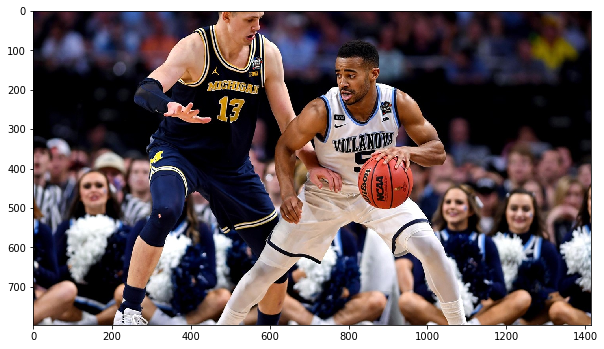

In [4]:
img = cv2.imread("basketball.jpeg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

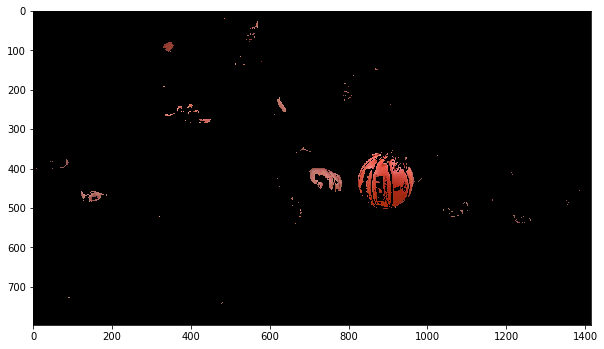

In [5]:
# Easier to operate color in HSV
img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)

upper_orange = np.array([6,255,255])
lower_orange = np.array([0,100,140])

mask = cv2.inRange(img_hsv, lower_orange, upper_orange)

img_masked = cv2.bitwise_and(img,img,mask=mask)
plt.imshow(img_masked)

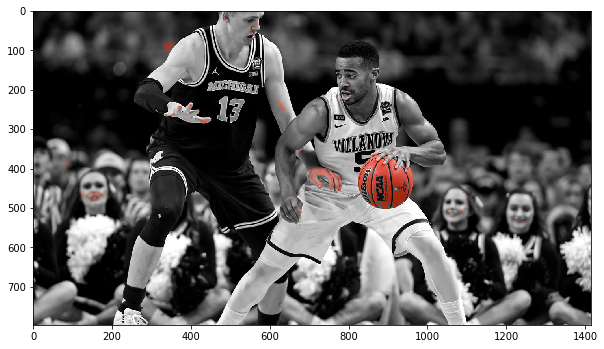

In [6]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_gray = cv2.cvtColor(img_gray,cv2.COLOR_GRAY2RGB)

img_pre = cv2.bitwise_and(img_gray,img_gray,mask=cv2.bitwise_not(mask))
img_done = cv2.add(img_pre,img_masked)
plt.imshow(img_done)

## Thresholding
We can use threshholding to truncate values of an image. OpenCV provides many thresholding methods.

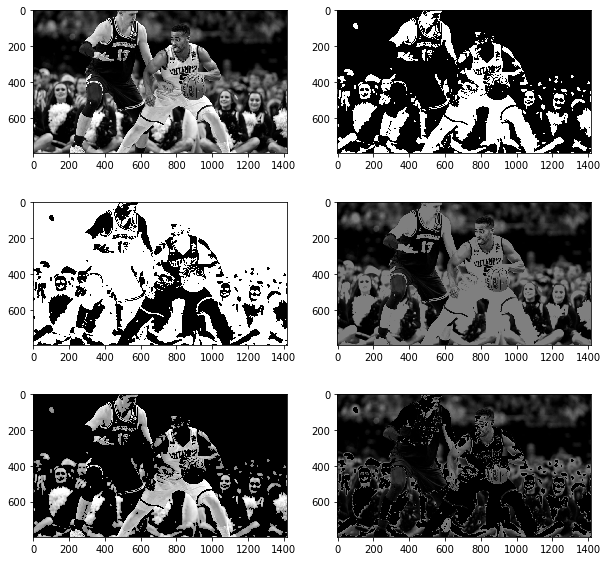

In [7]:
def thresholdAndShow(img,method):
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    ret, thresh = cv2.threshold(img,127,255,method)
    return thresh
    
methods = [cv2.THRESH_BINARY,cv2.THRESH_BINARY_INV,cv2.THRESH_TRUNC,cv2.THRESH_TOZERO,cv2.THRESH_TOZERO_INV]

plt.subplot(3,2,1),plt.imshow(img_gray)
for i in range(5):
    plt.subplot(3,2,i+2),plt.imshow(thresholdAndShow(img_gray,methods[i]))
    
plt.show()

It is also possible to perform adaptive thresholding in an image.

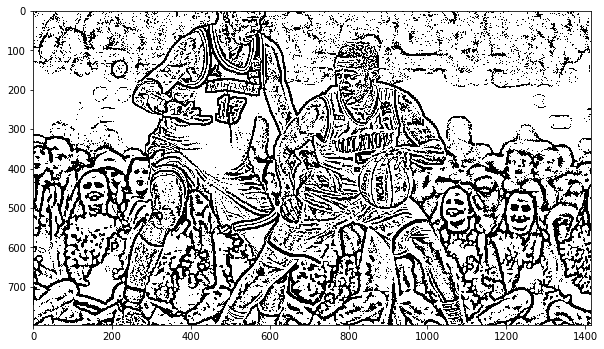

In [8]:
img_thresh = cv2.cvtColor(img_gray,cv2.COLOR_RGB2GRAY)
thresh = cv2.adaptiveThreshold(img_thresh, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
plt.imshow(thresh,'gray')

## Smoothing Images
In image processing we have many techniques for smoothing an image and removing noise.

### Convolution
Smoothing images using matrices:
```
           |1 1 1 1 1|
           |1 1 1 1 1|
K = (1/25) |1 1 1 1 1|
           |1 1 1 1 1|
           |1 1 1 1 1|
```
Using filter2D we can apply any matrix to a pixel.

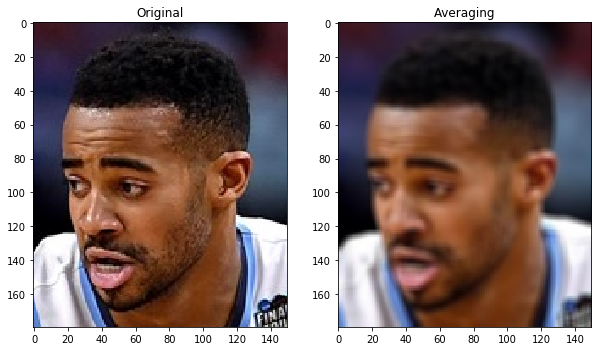

In [9]:
kernel = np.ones((5,5),np.float32)/25
img_roi = img[70:250,750:900]

img_smooth = cv2.filter2D(img_roi,-1,kernel)

plt.subplot(121),plt.imshow(img_roi),plt.title('Original')
plt.subplot(122),plt.imshow(img_smooth),plt.title('Averaging')
plt.show()

### Blurring
OpenCV provided methods to do operations such as the one above.

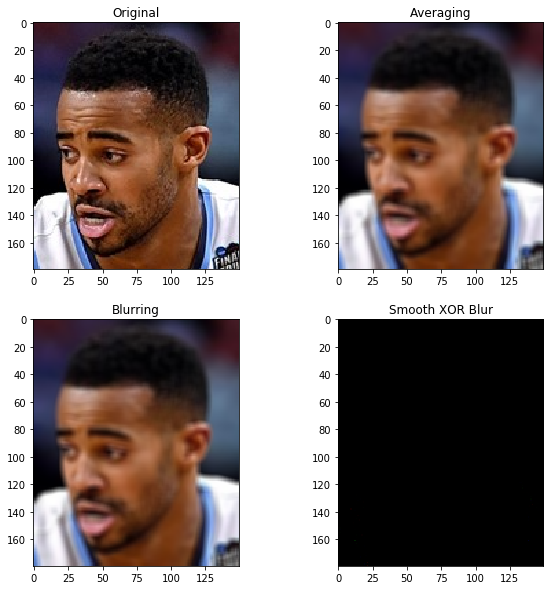

In [10]:
img_blur = cv2.blur(img_roi,(5,5))
plt.subplot(221),plt.imshow(img_roi),plt.title('Original')
plt.subplot(222),plt.imshow(img_smooth),plt.title('Averaging')
plt.subplot(223),plt.imshow(img_blur),plt.title('Blurring')

img_diff = cv2.bitwise_xor(img_smooth,img_blur)

plt.subplot(224),plt.imshow(img_diff),plt.title('Smooth XOR Blur')
plt.show()

### Gaussian Noise

(<matplotlib.image.AxesImage at 0x7f361033b908>, Text(0.5,1,'Noisy Image'))

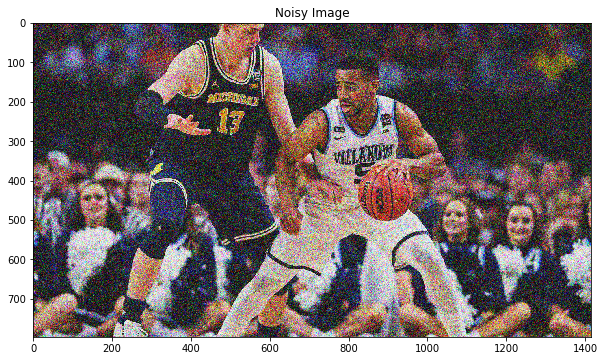

In [11]:
img_noisy = cv2.imread('basketball-noise.tiff')
img_noisy = cv2.cvtColor(img_noisy,cv2.COLOR_BGR2RGB)
plt.imshow(img_noisy),plt.title('Noisy Image')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36102eca58>,
 Text(0.5,1,'Gaussian Blur'))

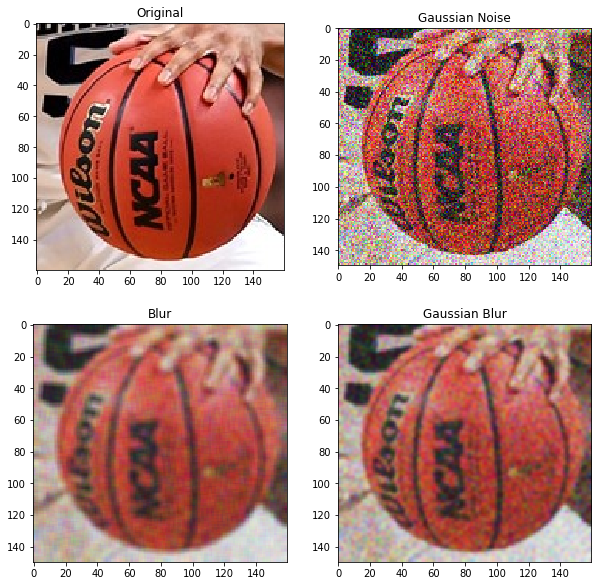

In [12]:
img_roi = img[350:510,810:970]
img_noisy_roi = img_noisy[360:510,810:970]

img_noisy_roi_blur = cv2.blur(img_noisy_roi,(5,5))
img_noisy_roi_gblur = cv2.GaussianBlur(img_noisy_roi,(5,5),0)

plt.subplot(221),plt.imshow(img_roi),plt.title('Original')
plt.subplot(222),plt.imshow(img_noisy_roi),plt.title('Gaussian Noise')
plt.subplot(223),plt.imshow(img_noisy_roi_blur),plt.title('Blur')
plt.subplot(224),plt.imshow(img_noisy_roi_gblur),plt.title('Gaussian Blur')

### Bilateral FIltering
Remove noise and keep edges sharp

In [13]:
img_noisy_bilateral_blur = cv2.bilateralFilter(img_noisy_roi,9,75,75)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36200b26a0>,
 Text(0.5,1,'Bilateral Blur'))

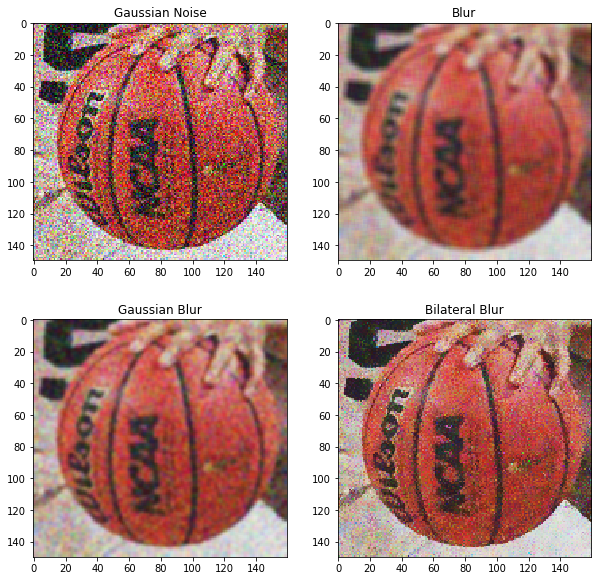

In [14]:
plt.subplot(221),plt.imshow(img_noisy_roi),plt.title('Gaussian Noise')
plt.subplot(222),plt.imshow(img_noisy_roi_blur),plt.title('Blur')
plt.subplot(223),plt.imshow(img_noisy_roi_gblur),plt.title('Gaussian Blur')
plt.subplot(224),plt.imshow(img_noisy_bilateral_blur),plt.title('Bilateral Blur')

## Morphological Transformations
Operations which interact with an image's shape


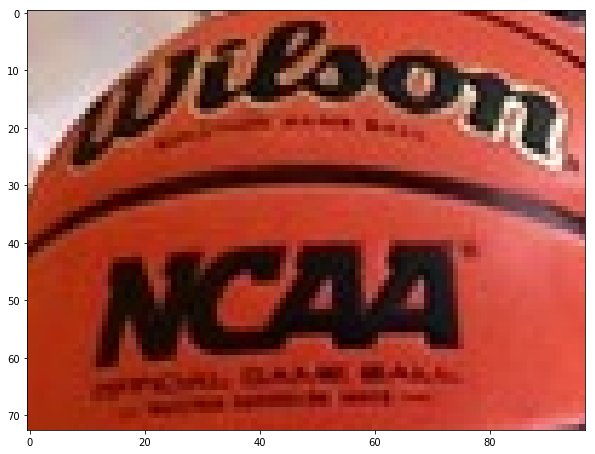

In [15]:
rows, cols, _ = img_roi.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,1)
img_roi = cv2.warpAffine(img_roi,M,(cols,rows))

img_roi = img_roi[20:93,15:112]

plt.imshow(img_roi)

(<matplotlib.image.AxesImage at 0x7f362007e518>, Text(0.5,1,'bin'))

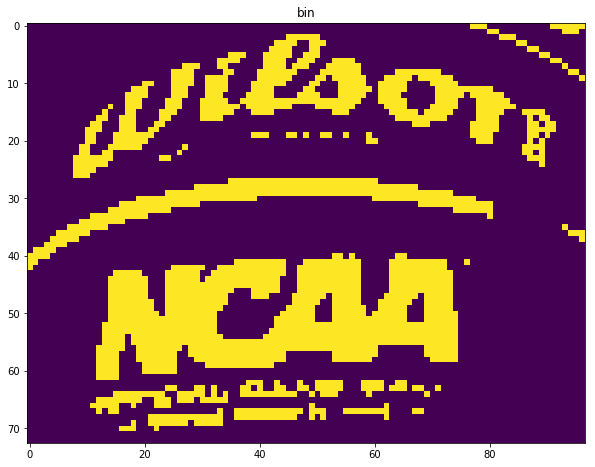

In [16]:
img_gray = cv2.cvtColor(img_roi, cv2.COLOR_RGB2GRAY)

ret, img_bin = cv2.threshold(img_gray,60,255,cv2.THRESH_BINARY_INV)

plt.imshow(img_bin),plt.title('bin')

### Erosion
Erodes away the boundaries of objects

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36104409b0>,
 Text(0.5,1,'Erosion'))

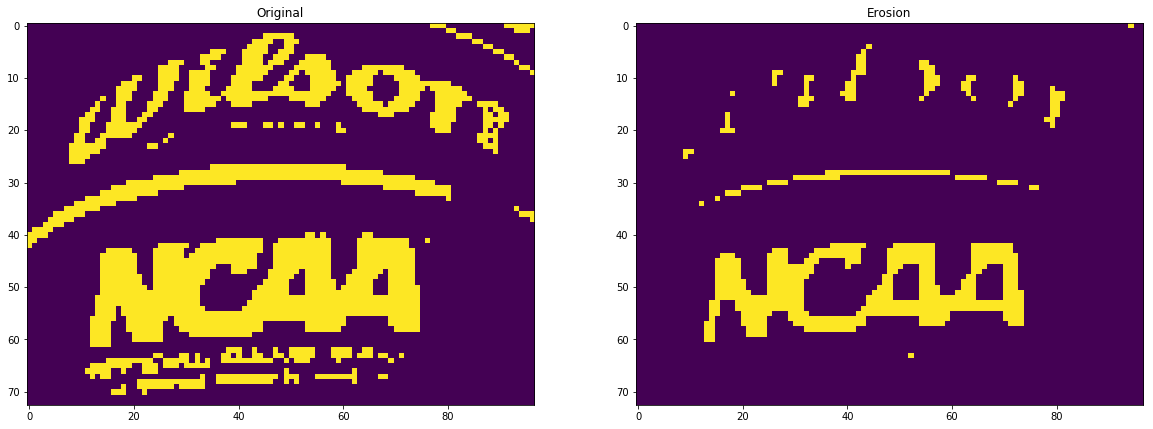

In [17]:
plt.rcParams['figure.figsize'] = [20.0,15.0]

kernel = np.ones((3,3),np.uint8)

img_erosion = cv2.erode(img_bin,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img_bin),plt.title('Original')
plt.subplot(122),plt.imshow(img_erosion),plt.title('Erosion')

### Dilation
Opposite to erosion

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36104aa668>,
 Text(0.5,1,'Dilation'))

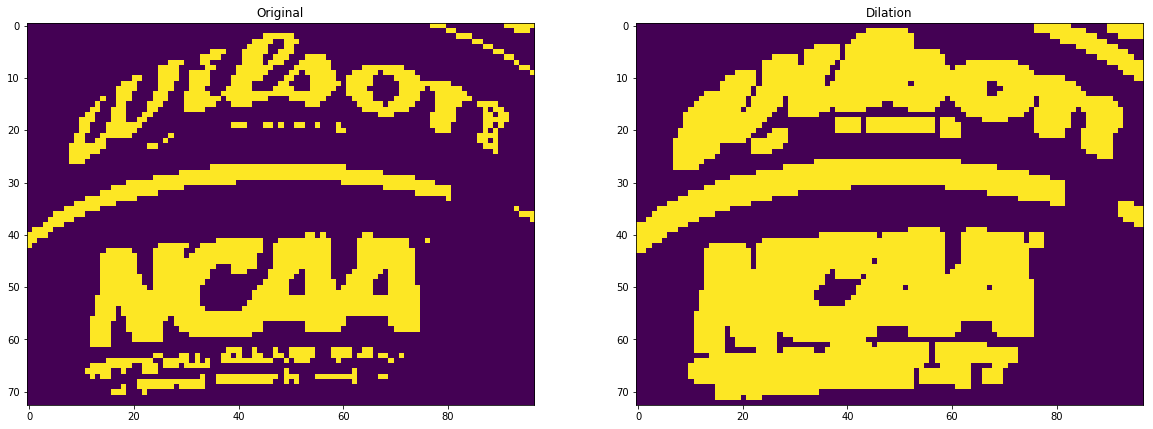

In [18]:
img_dilated = cv2.dilate(img_bin,kernel,iterations = 1)

plt.subplot(121),plt.imshow(img_bin),plt.title('Original')
plt.subplot(122),plt.imshow(img_dilated),plt.title('Dilation')

### Opening and Closing
Opening is erosion followed by dilation. Usefull for removing noise.
Closing is the opposite, its usefull for closiong holes in objects (watch the 'N' in Wilson)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3639dd06a0>,
 Text(0.5,1,'Closing'))

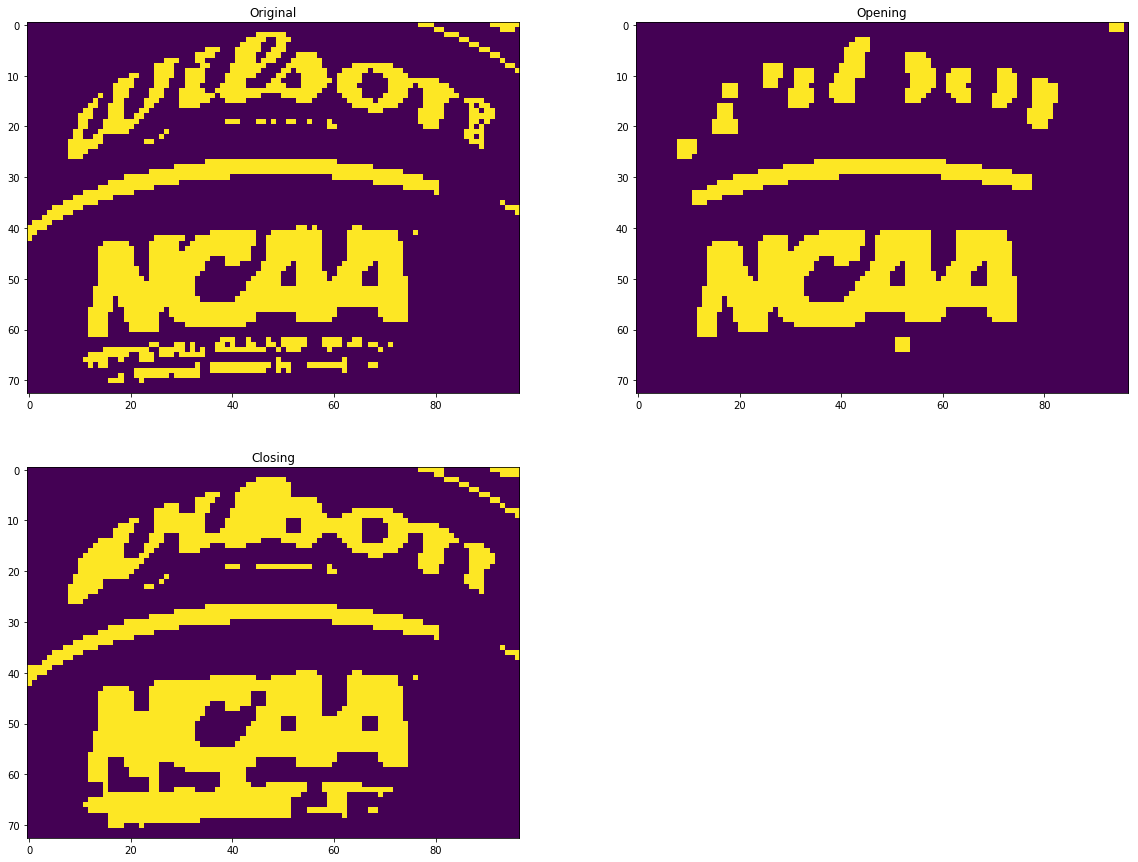

In [19]:
img_open = cv2.morphologyEx(img_bin, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

plt.subplot(221),plt.imshow(img_bin),plt.title('Original')
plt.subplot(222),plt.imshow(img_open),plt.title('Opening')
plt.subplot(223),plt.imshow(img_close),plt.title('Closing')

### Morphological Gradient
It is the difference between the dilation and erosion of an image.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f36100e1048>,
 Text(0.5,1,'Morphological Gradient'))

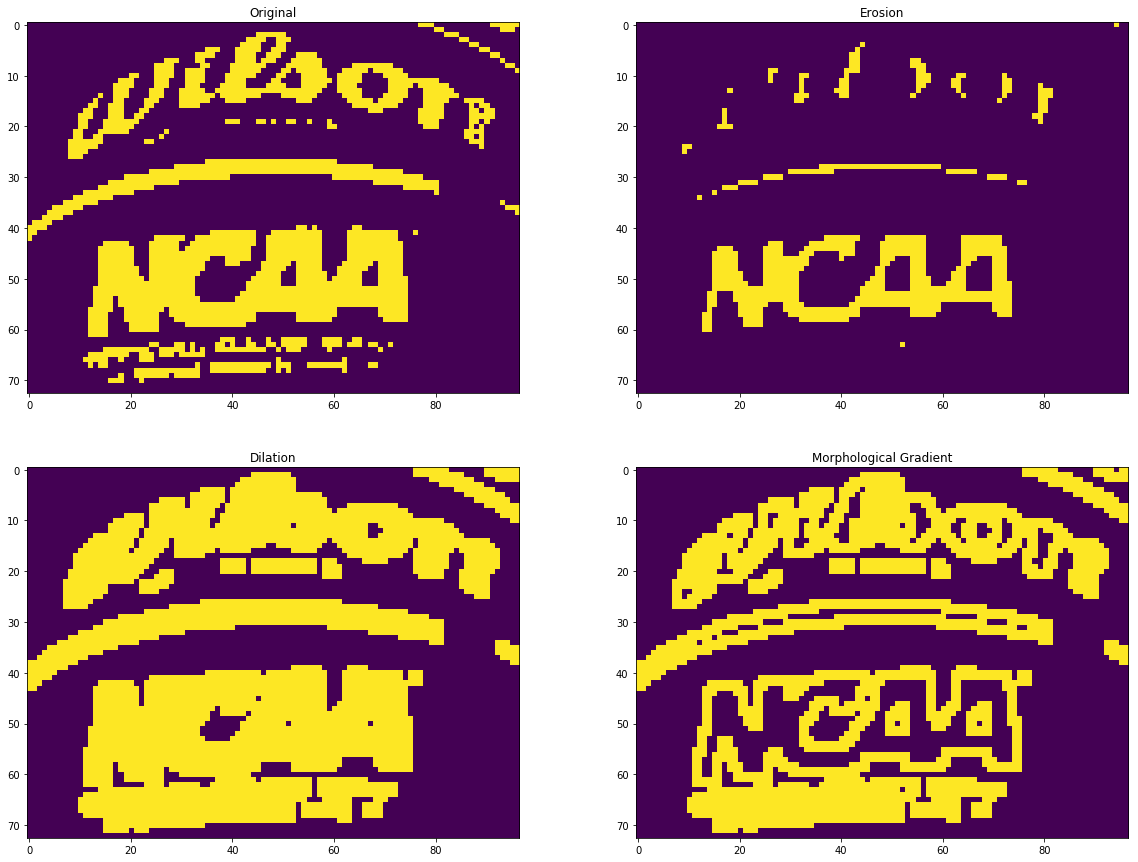

In [20]:
img_grad = cv2.morphologyEx(img_bin, cv2.MORPH_GRADIENT, kernel)

plt.subplot(221),plt.imshow(img_bin),plt.title('Original')
plt.subplot(222),plt.imshow(img_erosion),plt.title('Erosion')
plt.subplot(223),plt.imshow(img_dilated),plt.title('Dilation')
plt.subplot(224),plt.imshow(img_grad),plt.title('Morphological Gradient')

### Top Hat and Black Hat
Difference between image and the opening. 
Black Hat is the difference between the closing and the original image.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f35ec667780>,
 Text(0.5,1,'Black Hat'))

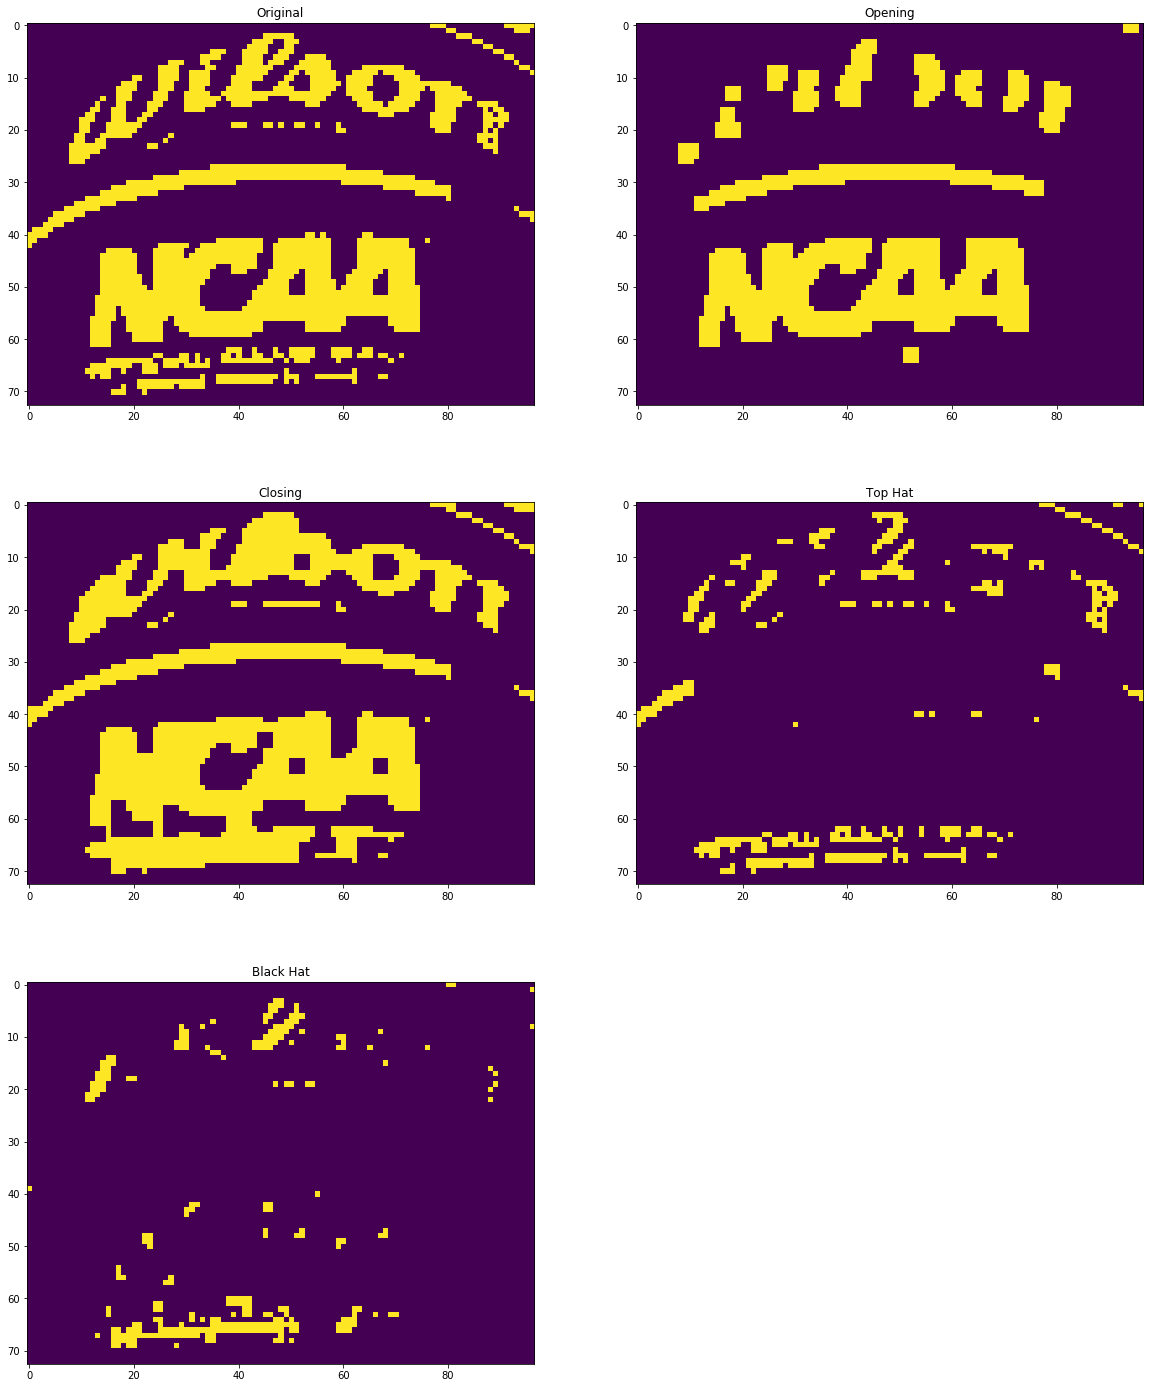

In [21]:
plt.rcParams['figure.figsize'] = [20.0,25.0]

img_tophat = cv2.morphologyEx(img_bin, cv2.MORPH_TOPHAT, kernel)
img_blackhat = cv2.morphologyEx(img_bin, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(321),plt.imshow(img_bin),plt.title('Original')
plt.subplot(322),plt.imshow(img_open),plt.title('Opening')
plt.subplot(323),plt.imshow(img_close),plt.title('Closing')
plt.subplot(324),plt.imshow(img_tophat),plt.title('Top Hat')
plt.subplot(325),plt.imshow(img_blackhat),plt.title('Black Hat')

### Different Kernels
Different kernels render different results. Feel free to use any of the kernels below and rerun the notebook to see different results:

In [22]:
# Elliptical Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(kernel)

print()

# Cross-shaped Kernel
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
print(kernel)

[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]

[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


## Edge Detection

(Text(0.5,1,'Sobel Y'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

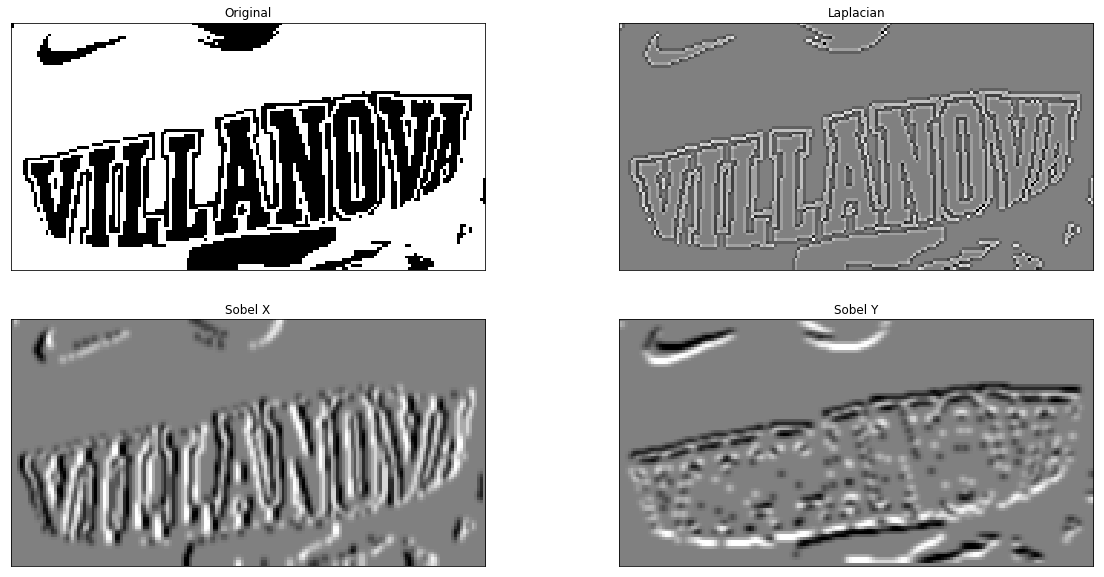

In [33]:
img_roi = img[283:369,756:921]
img_gray = cv2.cvtColor(img_roi,cv2.COLOR_RGB2GRAY)
ret, img_gray_processed = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

laplacian = cv2.Laplacian(img_gray_processed,cv2.CV_64F)
sobelx = cv2.Sobel(img_gray_processed,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_gray_processed,cv2.CV_64F,0,1,ksize=5)

plt.rcParams['figure.figsize'] = [20.0,10.0]

plt.subplot(2,2,1),plt.imshow(img_gray_processed,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])